<a href="https://colab.research.google.com/github/rajaramkuberan/BigDataCourswork/blob/main/Big_data_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Module: 7082CEM**
### **Coursework Topic: Multi-Class Classification of Orbits for all known Asteroids using Pyspark**  

## 1. Pyspark Installation:

In [1]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 79kB/s 
     |████████████████████████████████| 204kB 20.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=9a9f85f1bfd7f0acd06338cc0c52061488fd58e549291fee875b7d4c8043de6b
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


##2. Import Dependencies:

In [2]:
import pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
spark=SparkSession.builder.master("local[*]").appName('BigData_CW').getOrCreate()


##3. Import Data:

In [7]:
orbit_data=spark.read.csv('/content/orbit_asteroid.csv',inferSchema=True,header=True)

##4. Dataset Description:

In [8]:
orbit_data.count()

524287

In [9]:
orbit_data.show()

+--------+---------------+--------+----+----+-------+----+---+---------+----------+------------+------+----------+---------------+--------------------+---------+---------+---------+---------+--------+---------+----------+---------+---------+--------+--------+---------+----------+-----------+--------------+---------------+-------------+----------------+--------------+----------+
|NEO_flag|One_km_NEO_flag|PHA_flag|   H|   G|Num_obs| rms|  U|Arc_years|Perturbers|Perturbers_2|Number|      Name|Principal_desig|        Other_desigs|    Epoch|        M|     Peri|     Node|       i|        e|         n|        a|      Ref|Num_opps|Computer|Hex_flags|  Last_obs|         Tp|Orbital_period|Perihelion_dist|Aphelion_dist|Semilatus_rectum|Synodic_period|Orbit_type|
+--------+---------------+--------+----+----+-------+----+---+---------+----------+------------+------+----------+---------------+--------------------+---------+---------+---------+---------+--------+---------+----------+---------+-------

In [11]:
orbit_data.printSchema()

root
 |-- NEO_flag: string (nullable = true)
 |-- One_km_NEO_flag: string (nullable = true)
 |-- PHA_flag: string (nullable = true)
 |-- H: double (nullable = true)
 |-- G: double (nullable = true)
 |-- Num_obs: integer (nullable = true)
 |-- rms: string (nullable = true)
 |-- U: string (nullable = true)
 |-- Arc_years: string (nullable = true)
 |-- Perturbers: string (nullable = true)
 |-- Perturbers_2: string (nullable = true)
 |-- Number: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Principal_desig: string (nullable = true)
 |-- Other_desigs: string (nullable = true)
 |-- Epoch: double (nullable = true)
 |-- M: double (nullable = true)
 |-- Peri: double (nullable = true)
 |-- Node: double (nullable = true)
 |-- i: double (nullable = true)
 |-- e: double (nullable = true)
 |-- n: double (nullable = true)
 |-- a: double (nullable = true)
 |-- Ref: string (nullable = true)
 |-- Num_opps: integer (nullable = true)
 |-- Computer: string (nullable = true)
 |-- Hex_fl

##5. Finding nan Values:

In [12]:
from pyspark.sql.functions import isnan, when, count, col
orbit_data.select([count(when(isnan(c), c)).alias(c) for c in orbit_data.columns]).show()

+--------+---------------+--------+---+---+-------+---+---+---------+----------+------------+------+------+---------------+------------+-----+---+----+----+---+---+---+---+---+--------+--------+---------+--------+---+--------------+---------------+-------------+----------------+--------------+----------+
|NEO_flag|One_km_NEO_flag|PHA_flag|  H|  G|Num_obs|rms|  U|Arc_years|Perturbers|Perturbers_2|Number|  Name|Principal_desig|Other_desigs|Epoch|  M|Peri|Node|  i|  e|  n|  a|Ref|Num_opps|Computer|Hex_flags|Last_obs| Tp|Orbital_period|Perihelion_dist|Aphelion_dist|Semilatus_rectum|Synodic_period|Orbit_type|
+--------+---------------+--------+---+---+-------+---+---+---------+----------+------------+------+------+---------------+------------+-----+---+----+----+---+---+---+---+---+--------+--------+---------+--------+---+--------------+---------------+-------------+----------------+--------------+----------+
|  521479|         523121|  523559|  0|  0|      0|  2|  3|        0|         0|  

## 6. Categorical Features Count:

In [13]:
orbit_data.groupBy('Computer').count().show()
orbit_data.groupBy('Orbit_type').count().show()




+----------+------+
|  Computer| count|
+----------+------+
|    MPCADO|   498|
|     Veres|   271|
|Alexanders|     9|
|  Williams| 90500|
|  MPCLINUX| 73196|
|    MPCALB|    74|
|    MPCMEL|     6|
|       Pan|296588|
|      Pike|     1|
|    MPCAPO|    26|
|    MPCALI|     2|
|      MPCW| 63109|
|      MPCM|     7|
+----------+------+

+--------------------+------+
|          Orbit_type| count|
+--------------------+------+
|               Atira|     9|
|                Aten|   221|
|Object with perih...|  4369|
|               Hilda|  2216|
|                Amor|  1223|
|            Hungaria|  8848|
|             Phocaea|  5147|
|      Distant Object|   645|
|      Jupiter Trojan|  4869|
|                 MBA|495385|
|              Apollo|  1355|
+--------------------+------+



## 7. Removing Redundant Features:

In [14]:
reduntant_col={'NEO_flag','One_km_NEO_flag','PHA_flag','Name','Other_desigs','Number','U','Arc_years','Perturbers',
               'Perturbers_2','Ref','Principal_desig','Hex_flags','Last_obs'}
classify_col=orbit_data.drop(*reduntant_col)

In [15]:
classify_col.printSchema()

root
 |-- H: double (nullable = true)
 |-- G: double (nullable = true)
 |-- Num_obs: integer (nullable = true)
 |-- rms: string (nullable = true)
 |-- Epoch: double (nullable = true)
 |-- M: double (nullable = true)
 |-- Peri: double (nullable = true)
 |-- Node: double (nullable = true)
 |-- i: double (nullable = true)
 |-- e: double (nullable = true)
 |-- n: double (nullable = true)
 |-- a: double (nullable = true)
 |-- Num_opps: integer (nullable = true)
 |-- Computer: string (nullable = true)
 |-- Tp: double (nullable = true)
 |-- Orbital_period: double (nullable = true)
 |-- Perihelion_dist: double (nullable = true)
 |-- Aphelion_dist: double (nullable = true)
 |-- Semilatus_rectum: double (nullable = true)
 |-- Synodic_period: double (nullable = true)
 |-- Orbit_type: string (nullable = true)



##8. Casting the Features:

In [16]:
data_cast = classify_col.withColumn("H",col("H").cast('float')) \
                        .withColumn("G",col("G").cast('float')) \
                        .withColumn("Num_obs",col("Num_obs").cast('integer'))\
                        .withColumn("rms",col("rms").cast('float'))\
                        

	


In [17]:
data_cast.printSchema()

root
 |-- H: float (nullable = true)
 |-- G: float (nullable = true)
 |-- Num_obs: integer (nullable = true)
 |-- rms: float (nullable = true)
 |-- Epoch: double (nullable = true)
 |-- M: double (nullable = true)
 |-- Peri: double (nullable = true)
 |-- Node: double (nullable = true)
 |-- i: double (nullable = true)
 |-- e: double (nullable = true)
 |-- n: double (nullable = true)
 |-- a: double (nullable = true)
 |-- Num_opps: integer (nullable = true)
 |-- Computer: string (nullable = true)
 |-- Tp: double (nullable = true)
 |-- Orbital_period: double (nullable = true)
 |-- Perihelion_dist: double (nullable = true)
 |-- Aphelion_dist: double (nullable = true)
 |-- Semilatus_rectum: double (nullable = true)
 |-- Synodic_period: double (nullable = true)
 |-- Orbit_type: string (nullable = true)



##9. String Indexing of Categorical Features:

In [18]:
from pyspark.ml.feature import StringIndexer
orbit = StringIndexer(inputCol="Orbit_type", outputCol="Orbit_type_Index").setHandleInvalid("skip")
computer = StringIndexer(inputCol="Computer", outputCol="Computer_Index").setHandleInvalid("skip")
computer_string_indexer = computer.fit(data_cast).transform(data_cast)
orbit_string_indexer = orbit.fit(computer_string_indexer).transform(computer_string_indexer)
orbit_string_indexer.show()



+----+----+-------+----+---------+---------+---------+---------+--------+---------+----------+---------+--------+--------+-----------+--------------+---------------+-------------+----------------+--------------+----------+--------------+----------------+
|   H|   G|Num_obs| rms|    Epoch|        M|     Peri|     Node|       i|        e|         n|        a|Num_opps|Computer|         Tp|Orbital_period|Perihelion_dist|Aphelion_dist|Semilatus_rectum|Synodic_period|Orbit_type|Computer_Index|Orbit_type_Index|
+----+----+-------+----+---------+---------+---------+---------+--------+---------+----------+---------+--------+--------+-----------+--------------+---------------+-------------+----------------+--------------+----------+--------------+----------------+
|3.53|0.15|   7277|0.51|2459200.5|205.54543| 73.72487| 80.27236| 10.5879|0.0781685|0.21424211|2.7660891|     118|     Pan|2459921.435|     4.6004387|      2.5498681|    2.9823101|       1.3745937|     1.2777439|       MBA|           0.

##10. Distribution of Indexed Features:

In [19]:
orbit_string_indexer.groupBy('Orbit_type_Index').count().show()
orbit_string_indexer.groupBy('Computer_Index').count().show(100)
orbit_string_indexer.count()

+----------------+------+
|Orbit_type_Index| count|
+----------------+------+
|             8.0|   645|
|             0.0|495385|
|             7.0|  1223|
|             1.0|  8848|
|             4.0|  4369|
|             3.0|  4869|
|             2.0|  5147|
|            10.0|     9|
|             6.0|  1355|
|             5.0|  2216|
|             9.0|   221|
+----------------+------+

+--------------+------+
|Computer_Index| count|
+--------------+------+
|           8.0|     9|
|           0.0|296588|
|           7.0|    26|
|           1.0| 90500|
|           4.0|   498|
|          11.0|     2|
|           3.0| 63109|
|           2.0| 73196|
|          10.0|     6|
|           6.0|    74|
|           5.0|   271|
|           9.0|     7|
|          12.0|     1|
+--------------+------+



524287

##11. One Hot Encoding of the Categorical Features:

In [20]:
from pyspark.ml.feature import OneHotEncoder
#onehotencoder to Orbit_type_Index
OHE_Orbit_type_vector = OneHotEncoder(inputCol="Orbit_type_Index", outputCol="Orbit_type_vec")
OHE_Computer_vector = OneHotEncoder(inputCol="Computer_Index", outputCol="Computer_vec")
orbit_OHE = OHE_Computer_vector.fit(orbit_string_indexer).transform(orbit_string_indexer)
orbit_data_OHE = OHE_Orbit_type_vector.fit(orbit_OHE).transform(orbit_OHE)
orbit_data_OHE.show(truncate=False)

+----+----+-------+----+---------+---------+---------+---------+--------+---------+----------+---------+--------+--------+-----------+--------------+---------------+-------------+----------------+--------------+----------+--------------+----------------+--------------+--------------+
|H   |G   |Num_obs|rms |Epoch    |M        |Peri     |Node     |i       |e        |n         |a        |Num_opps|Computer|Tp         |Orbital_period|Perihelion_dist|Aphelion_dist|Semilatus_rectum|Synodic_period|Orbit_type|Computer_Index|Orbit_type_Index|Computer_vec  |Orbit_type_vec|
+----+----+-------+----+---------+---------+---------+---------+--------+---------+----------+---------+--------+--------+-----------+--------------+---------------+-------------+----------------+--------------+----------+--------------+----------------+--------------+--------------+
|3.53|0.15|7277   |0.51|2459200.5|205.54543|73.72487 |80.27236 |10.5879 |0.0781685|0.21424211|2.7660891|118     |Pan     |2459921.435|4.6004387  

In [21]:
orbit_data_OHE.printSchema()

root
 |-- H: float (nullable = true)
 |-- G: float (nullable = true)
 |-- Num_obs: integer (nullable = true)
 |-- rms: float (nullable = true)
 |-- Epoch: double (nullable = true)
 |-- M: double (nullable = true)
 |-- Peri: double (nullable = true)
 |-- Node: double (nullable = true)
 |-- i: double (nullable = true)
 |-- e: double (nullable = true)
 |-- n: double (nullable = true)
 |-- a: double (nullable = true)
 |-- Num_opps: integer (nullable = true)
 |-- Computer: string (nullable = true)
 |-- Tp: double (nullable = true)
 |-- Orbital_period: double (nullable = true)
 |-- Perihelion_dist: double (nullable = true)
 |-- Aphelion_dist: double (nullable = true)
 |-- Semilatus_rectum: double (nullable = true)
 |-- Synodic_period: double (nullable = true)
 |-- Orbit_type: string (nullable = true)
 |-- Computer_Index: double (nullable = false)
 |-- Orbit_type_Index: double (nullable = false)
 |-- Computer_vec: vector (nullable = true)
 |-- Orbit_type_vec: vector (nullable = true)



##12. Replace Null Values using Imputer Function:

In [22]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['rms'], 
    outputCols=["{}_imputed".format(c) for c in ['rms']]
    ).setStrategy("mean")

In [23]:
orbit_data_impute=imputer.fit(orbit_data_OHE).transform(orbit_data_OHE)


In [24]:
orbit_data_impute.printSchema()

root
 |-- H: float (nullable = true)
 |-- G: float (nullable = true)
 |-- Num_obs: integer (nullable = true)
 |-- rms: float (nullable = true)
 |-- Epoch: double (nullable = true)
 |-- M: double (nullable = true)
 |-- Peri: double (nullable = true)
 |-- Node: double (nullable = true)
 |-- i: double (nullable = true)
 |-- e: double (nullable = true)
 |-- n: double (nullable = true)
 |-- a: double (nullable = true)
 |-- Num_opps: integer (nullable = true)
 |-- Computer: string (nullable = true)
 |-- Tp: double (nullable = true)
 |-- Orbital_period: double (nullable = true)
 |-- Perihelion_dist: double (nullable = true)
 |-- Aphelion_dist: double (nullable = true)
 |-- Semilatus_rectum: double (nullable = true)
 |-- Synodic_period: double (nullable = true)
 |-- Orbit_type: string (nullable = true)
 |-- Computer_Index: double (nullable = false)
 |-- Orbit_type_Index: double (nullable = false)
 |-- Computer_vec: vector (nullable = true)
 |-- Orbit_type_vec: vector (nullable = true)
 |-- rms

In [25]:
drop_rms={'rms'}
orbit_data_final=orbit_data_impute.drop(*drop_rms)

In [26]:
orbit_data_final.printSchema()

root
 |-- H: float (nullable = true)
 |-- G: float (nullable = true)
 |-- Num_obs: integer (nullable = true)
 |-- Epoch: double (nullable = true)
 |-- M: double (nullable = true)
 |-- Peri: double (nullable = true)
 |-- Node: double (nullable = true)
 |-- i: double (nullable = true)
 |-- e: double (nullable = true)
 |-- n: double (nullable = true)
 |-- a: double (nullable = true)
 |-- Num_opps: integer (nullable = true)
 |-- Computer: string (nullable = true)
 |-- Tp: double (nullable = true)
 |-- Orbital_period: double (nullable = true)
 |-- Perihelion_dist: double (nullable = true)
 |-- Aphelion_dist: double (nullable = true)
 |-- Semilatus_rectum: double (nullable = true)
 |-- Synodic_period: double (nullable = true)
 |-- Orbit_type: string (nullable = true)
 |-- Computer_Index: double (nullable = false)
 |-- Orbit_type_Index: double (nullable = false)
 |-- Computer_vec: vector (nullable = true)
 |-- Orbit_type_vec: vector (nullable = true)
 |-- rms_imputed: float (nullable = true)


##13.Combining the input features into vectors using Vector Assembler: 

In [27]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
def assembler(orbit_data_final):
  for col in orbit_data_final.columns:
    data_assembler = VectorAssembler(inputCols=['H','G','Num_obs','rms_imputed','Epoch','M','Peri','Node','i','e','n','a',
                                                'Num_opps','Tp','Orbital_period','Perihelion_dist','Aphelion_dist','Semilatus_rectum',
                                                'Synodic_period','Computer_vec'], outputCol="features")
    orbit_type_data = data_assembler.transform(orbit_data_final)
    return orbit_type_data.select(['features','Orbit_type_Index'])
    


In [28]:
orbit_asteroid_dataset=assembler(orbit_data_final)
orbit_asteroid_dataset.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|features                                                                                                                                                                                                                                                             |Orbit_type_Index|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|[3.5299999713897705,0.15000000596046448,7277.0,0.5099999904632568,2459200.5,205.54543,73.72487,80.27236,10.5879,0.0781685,0.21424211,2.7660891,118.0,2459921

##14. Split the Dataset:

In [29]:
(trainData, testData) = orbit_asteroid_dataset.randomSplit([0.70, 0.30])
trainData.cache()
testData.cache()

DataFrame[features: vector, Orbit_type_Index: double]

In [30]:
 print(f"Size of train Dataset : {trainData.count()}" )
 print(f"Size of test Dataset : {testData.count()}" )

Size of train Dataset : 366625
Size of test Dataset : 157662


##15. Decision Tree Classifier:

### 1. Fitting the Model:

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(seed = 1180, labelCol="Orbit_type_Index", featuresCol="features", predictionCol="prediction")

dt_model = dt_classifier.fit(trainData)
print(dt_model.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_154daf6b1655, depth=5, numNodes=45, numClasses=11, numFeatures=31
  If (feature 17 <= 0.9851644)
   If (feature 9 <= 0.1729344)
    If (feature 8 <= 14.633125)
     If (feature 12 <= 7.5)
      If (feature 3 <= 0.41499999165534973)
       Predict: 0.0
      Else (feature 3 > 0.41499999165534973)
       Predict: 7.0
     Else (feature 12 > 7.5)
      If (feature 15 <= 1.71030035)
       Predict: 4.0
      Else (feature 15 > 1.71030035)
       Predict: 0.0
    Else (feature 8 > 14.633125)
     If (feature 15 <= 1.71030035)
      If (feature 9 <= 0.0591151)
       Predict: 4.0
      Else (feature 9 > 0.0591151)
       Predict: 1.0
     Else (feature 15 > 1.71030035)
      Predict: 1.0
   Else (feature 9 > 0.1729344)
    If (feature 11 <= 2.1322194000000003)
     If (feature 9 <= 0.2883538)
      If (feature 16 <= 2.3166167499999997)
       Predict: 7.0
      Else (feature 16 > 2.3166167499999997)
       Predict: 4.0
     Else (fe

In [32]:
dt_model.featureImportances

SparseVector(31, {0: 0.0078, 3: 0.0001, 8: 0.0192, 9: 0.1207, 11: 0.0908, 12: 0.0003, 15: 0.1088, 16: 0.0875, 17: 0.4106, 18: 0.1542})

###2. Testing the Model:

In [33]:
 dt_model_predictions = dt_model.transform(testData)

###3. Model Performance:

In [34]:
dt_model_predictions.select(['Orbit_type_Index','probability','prediction']).show(10,False)

+----------------+-------------------------------------------------------------------------------------------------------------+----------+
|Orbit_type_Index|probability                                                                                                  |prediction|
+----------------+-------------------------------------------------------------------------------------------------------------+----------+
|8.0             |[0.05673758865248227,0.0,0.0,0.1519756838905775,0.0,0.6367781155015197,0.0,0.0,0.15450861195542046,0.0,0.0]  |5.0       |
|8.0             |[0.05673758865248227,0.0,0.0,0.1519756838905775,0.0,0.6367781155015197,0.0,0.0,0.15450861195542046,0.0,0.0]  |5.0       |
|8.0             |[0.05673758865248227,0.0,0.0,0.1519756838905775,0.0,0.6367781155015197,0.0,0.0,0.15450861195542046,0.0,0.0]  |5.0       |
|8.0             |[0.05673758865248227,0.0,0.0,0.1519756838905775,0.0,0.6367781155015197,0.0,0.0,0.15450861195542046,0.0,0.0]  |5.0       |
|8.0             |[0

###4. Model Performance Evaluation Metrics:

In [36]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dt_evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Orbit_type_Index')
print('F1 Score:',dt_evaluator.evaluate(dt_model_predictions,{dt_evaluator.metricName: 'f1'}))
print('Accuracy:',dt_evaluator.evaluate(dt_model_predictions,{dt_evaluator.metricName: 'accuracy'}))
print('Precision:',dt_evaluator.evaluate(dt_model_predictions,{dt_evaluator.metricName: 'weightedPrecision'}))
print('Recall:',dt_evaluator.evaluate(dt_model_predictions,{dt_evaluator.metricName: 'weightedRecall'}))
print('TruePositiveRate:',dt_evaluator.evaluate(dt_model_predictions,{dt_evaluator.metricName: 'weightedTruePositiveRate'}))
print('FalsePositiveRate:',dt_evaluator.evaluate(dt_model_predictions,{dt_evaluator.metricName: 'weightedFalsePositiveRate'}))


F1 Score: 0.9812648376427399
Accuracy: 0.9833250878461519
Precision: 0.9813798515777692
Recall: 0.9833250878461518
TruePositiveRate: 0.9833250878461518
FalsePositiveRate: 0.15460307775822427


In [38]:
confusionMatrix = dt_model_predictions.groupBy("Orbit_type_Index").pivot("prediction", range(0,11)).count()\
                  .na.fill(0.0).orderBy("Orbit_type_Index")
confusionMatrix.show()

+----------------+------+----+---+----+---+---+---+---+---+---+---+
|Orbit_type_Index|     0|   1|  2|   3|  4|  5|  6|  7|  8|  9| 10|
+----------------+------+----+---+----+---+---+---+---+---+---+---+
|             0.0|148586|   6|162|   5| 10| 67|  0|  0|  0|  0|  0|
|             1.0|    32|2580| 69|   0| 15|  0|  0| 19|  0|  0|  0|
|             2.0|   783|   0|812|   0|  0|  0|  0|  0|  0|  0|  0|
|             3.0|     0|   0|  0|1340|  0|118|  0|  0|  0|  0|  0|
|             4.0|   624|  35|  0|   0|594|  0| 19| 33|  0|  0|  0|
|             5.0|     0|   0|  0|  60|  0|620|  0|  0|  0|  0|  0|
|             6.0|     1|   2|  0|   0|  1|  0|319|104|  0|  0|  0|
|             7.0|     3|  18|  0|   0| 20|  0|148|182|  0|  0|  0|
|             8.0|     2|   0|  0|  61|  0|136|  0|  0|  0|  0|  0|
|             9.0|     0|   5|  0|   0|  0|  0| 56| 12|  0|  0|  0|
|            10.0|     0|   0|  0|   0|  0|  0|  3|  0|  0|  0|  0|
+----------------+------+----+---+----+---+---+-

##16. Random Forest Classifier:


###1. Training the Model 

In [39]:
from pyspark.ml.classification import RandomForestClassifier
rf_classifier = RandomForestClassifier(seed=1180, labelCol="Orbit_type_Index", featuresCol="features", predictionCol="prediction",
                                       numTrees=50,maxDepth=20)
rf_model = rf_classifier.fit(trainData)


###2. Testing the Model:

In [40]:
 rf_model_predictions = rf_model.transform(testData)

###3. Model Performance:

In [41]:
rf_model_predictions.select(['Orbit_type_Index','probability','prediction']).show(10,False)

+----------------+--------------------------------------------------------------------------------------------------------------+----------+
|Orbit_type_Index|probability                                                                                                   |prediction|
+----------------+--------------------------------------------------------------------------------------------------------------+----------+
|8.0             |[0.002765768052187318,0.0,0.0,0.12415968881099161,0.0,0.36586983105064436,0.0,0.0,0.5072047120861768,0.0,0.0] |8.0       |
|8.0             |[0.07039092791266705,0.0,0.0,0.37694815546772065,0.0,0.2887248360335317,0.0,0.0,0.26393608058608065,0.0,0.0]  |3.0       |
|8.0             |[0.022168158259501008,0.0,0.0,0.10492695303280623,0.0,0.15139825766275355,0.0,0.0,0.7215066310449392,0.0,0.0] |8.0       |
|8.0             |[0.09910101194628047,0.0,0.0,0.16354079616036138,0.0,0.2765991421196025,0.0,0.0,0.4607590497737557,0.0,0.0]   |8.0       |
|8.0         

###4. Model Performance Evaluation Metrics:

In [42]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rf_evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Orbit_type_Index')

print('F1 Score:',rf_evaluator.evaluate(rf_model_predictions,{rf_evaluator.metricName: 'f1'}))
print('Accuracy:',rf_evaluator.evaluate(rf_model_predictions,{rf_evaluator.metricName: 'accuracy'}))
print('Precision:',rf_evaluator.evaluate(rf_model_predictions,{rf_evaluator.metricName: 'weightedPrecision'}))
print('Recall:',rf_evaluator.evaluate(rf_model_predictions,{rf_evaluator.metricName: 'weightedRecall'}))
print('TruePositiveRate:',rf_evaluator.evaluate(rf_model_predictions,{rf_evaluator.metricName: 'weightedTruePositiveRate'}))
print('FalsePositiveRate:',rf_evaluator.evaluate(rf_model_predictions,{rf_evaluator.metricName: 'weightedFalsePositiveRate'}))

F1 Score: 0.9945429568167019
Accuracy: 0.9946975174740902
Precision: 0.9947376317480914
Recall: 0.99469751747409
TruePositiveRate: 0.99469751747409
FalsePositiveRate: 0.017143978973661322


In [44]:
confusionMatrix_rf = rf_model_predictions.groupBy("Orbit_type_Index").pivot("prediction", range(0,11)).count()\
                     .na.fill(0.0).orderBy("Orbit_type_Index")
confusionMatrix_rf.show()

+----------------+------+----+----+----+----+---+---+---+---+---+---+
|Orbit_type_Index|     0|   1|   2|   3|   4|  5|  6|  7|  8|  9| 10|
+----------------+------+----+----+----+----+---+---+---+---+---+---+
|             0.0|148658|  42|  28|   8|  74| 26|  0|  0|  0|  0|  0|
|             1.0|     3|2700|   0|   0|   8|  0|  0|  4|  0|  0|  0|
|             2.0|    61|   0|1534|   0|   0|  0|  0|  0|  0|  0|  0|
|             3.0|     0|   0|   0|1448|   0| 10|  0|  0|  0|  0|  0|
|             4.0|    95|  48|   1|   0|1120|  0| 10| 31|  0|  0|  0|
|             5.0|     0|   0|   0|  43|   0|637|  0|  0|  0|  0|  0|
|             6.0|     0|   1|   0|   0|   0|  0|338| 87|  0|  1|  0|
|             7.0|     0|  17|   0|   0|  16|  0|121|217|  0|  0|  0|
|             8.0|     1|   0|   0|  29|   0|  1|  0|  0|168|  0|  0|
|             9.0|     0|   5|   0|   0|   0|  0| 54|  8|  0|  6|  0|
|            10.0|     0|   0|   0|   0|   0|  0|  2|  0|  0|  1|  0|
+----------------+--

##17. Correlation Plot:

In [45]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [53]:
# Correlation matrix:
def Correlation_Matrix(data, gw):
    filename = data.dataframeName
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(gw, gw), dpi=80, facecolor='w', edgecolor='k')
    corrMatrix = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMatrix)
    plt.title(f'Correlation Plot for {filename}', fontsize=12)
    plt.show()

In [54]:
python_data = pd.read_csv('/content/orbit_asteroid.csv', delimiter=',')
python_data.dataframeName = 'orbit_asteroid.csv'


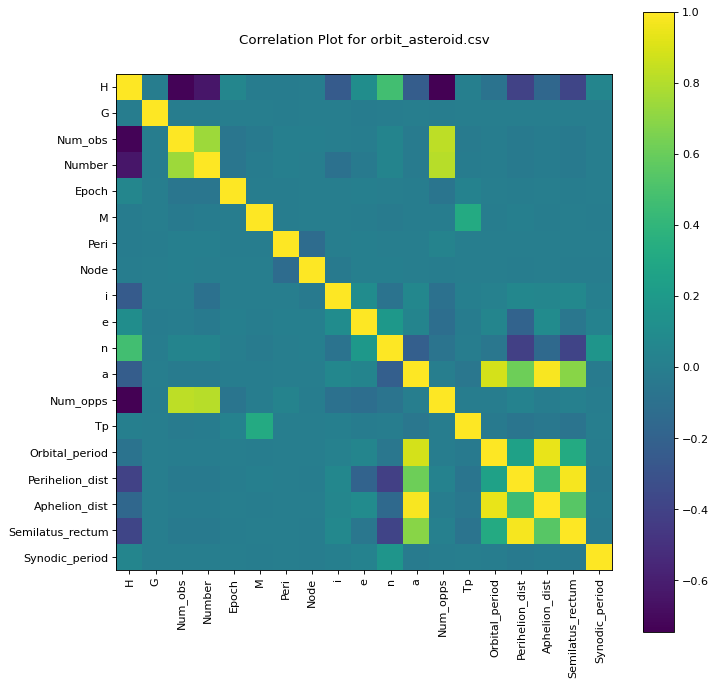

In [55]:
Correlation_Matrix(python_data, 10)